<a href="https://colab.research.google.com/github/hiroharu8864/AI_python/blob/master/turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload File
from google.colab import files
upload = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [6]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<function matplotlib.pyplot.show>

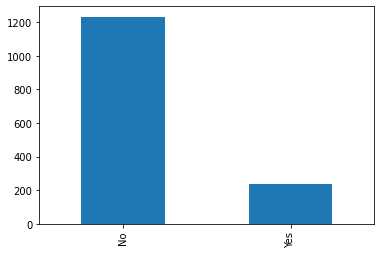

In [7]:
import matplotlib.pyplot as plt
df['Attrition'].value_counts().plot(kind='bar')
plt.show

<function matplotlib.pyplot.show>

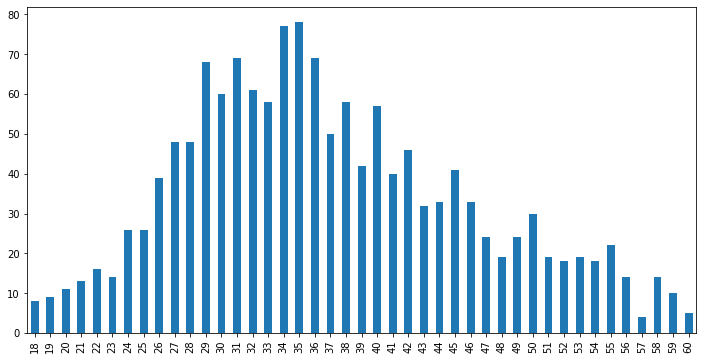

In [8]:
# 年齢をグラフにする
plt.subplots(figsize=(12,6))
df['Age'].value_counts().sort_index().plot(kind='bar')
plt.show

In [9]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [10]:
# 必要のないカラムを削除する
df = df.drop('Over18', axis=1)
df = df.drop('StandardHours', axis=1)
df = df.drop('EmployeeNumber', axis=1)
df = df.drop('EmployeeCount', axis=1)

In [11]:
df.shape

(1470, 31)

In [12]:
print(df['Age'].dtype)

int64


In [13]:
print(df['Attrition'].dtype)

object


In [14]:
for column in df.columns:
  if df[column].dtype == object:
    print(column, ":", df[column].dtype)
    print(df[column].unique())
    print("---------------")

Attrition : object
['Yes' 'No']
---------------
BusinessTravel : object
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
---------------
Department : object
['Sales' 'Research & Development' 'Human Resources']
---------------
EducationField : object
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
---------------
Gender : object
['Female' 'Male']
---------------
JobRole : object
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
---------------
MaritalStatus : object
['Single' 'Married' 'Divorced']
---------------
OverTime : object
['Yes' 'No']
---------------


In [15]:
for column in df.columns:
  if df[column].dtype == object:
    print(column, ":", df[column].dtype)
    print(df[column].value_counts())
    print("---------------")

Attrition : object
No     1233
Yes     237
Name: Attrition, dtype: int64
---------------
BusinessTravel : object
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
---------------
Department : object
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
---------------
EducationField : object
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
---------------
Gender : object
Male      882
Female    588
Name: Gender, dtype: int64
---------------
JobRole : object
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resource

In [16]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
  if df[column].dtype == object:
    print(column, ":", df[column].dtype)
    print(df[column].unique())
    df[column] = LabelEncoder().fit_transform(df[column])
    print(df[column].unique())
    print("---------------")

Attrition : object
['Yes' 'No']
[1 0]
---------------
BusinessTravel : object
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
[2 1 0]
---------------
Department : object
['Sales' 'Research & Development' 'Human Resources']
[2 1 0]
---------------
EducationField : object
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
[1 4 3 2 5 0]
---------------
Gender : object
['Female' 'Male']
[0 1]
---------------
JobRole : object
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
[7 6 2 4 0 3 8 5 1]
---------------
MaritalStatus : object
['Single' 'Married' 'Divorced']
[2 1 0]
---------------
OverTime : object
['Yes' 'No']
[1 0]
---------------


In [17]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [18]:
# 退職有無を分析したいので、一番左列にAttritionを持ってくる
df['Age_years'] = df['Age']
df = df.drop('Age', axis=1)

In [19]:
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_years
0,1,2,1102,2,1,2,1,2,0,94,...,1,0,8,0,1,6,4,0,5,41
1,0,1,279,1,8,1,1,3,1,61,...,4,1,10,3,3,10,7,1,7,49
2,1,2,1373,1,2,2,4,4,1,92,...,2,0,7,3,3,0,0,0,0,37
3,0,1,1392,1,3,4,1,4,0,56,...,3,0,8,3,3,8,7,3,0,33
4,0,2,591,1,2,1,3,1,1,40,...,4,1,6,3,3,2,2,2,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,884,1,23,2,3,3,1,41,...,3,1,17,3,3,5,2,0,3,36
1466,0,2,613,1,6,1,3,4,1,42,...,1,1,9,5,3,7,7,1,7,39
1467,0,2,155,1,4,3,1,2,1,87,...,2,1,6,0,3,6,2,0,3,27
1468,0,1,1023,2,2,3,3,4,1,63,...,4,0,17,3,2,9,6,0,8,49


In [20]:
# df.iloc[行, 列]
Y = df.iloc[:,0].values
Y

array([1, 0, 1, ..., 0, 0, 0])

In [21]:
X = df.iloc[:, 1:31].values
X

array([[   2, 1102,    2, ...,    0,    5,   41],
       [   1,  279,    1, ...,    1,    7,   49],
       [   2, 1373,    1, ...,    0,    0,   37],
       ...,
       [   2,  155,    1, ...,    0,    3,   27],
       [   1, 1023,    2, ...,    0,    8,   49],
       [   2,  628,    1, ...,    1,    2,   34]])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [23]:
X_train.shape

(1102, 30)

In [24]:
X_test.shape

(368, 30)

In [25]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)

RandomForestClassifier()

In [26]:
RFC.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [27]:
Y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [28]:
# 精度の確認
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, RFC.predict(X_test))
cm

array([[308,   2],
       [ 48,  10]])

In [29]:
RFC.score(X_test, Y_test)

0.8641304347826086

In [30]:
RFC.score(X_train, Y_train)

1.0

In [32]:
from pandas.core import algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
LR  = LogisticRegression(max_iter=8000)
SVC = SVC()

algorithms_name = ["ランダムフォレスト", "決定木", "ロジスティック回帰", "サポートベクターマシーン"]
algorithms= [RFC, DTC, LR, SVC]

for alg_name, alg in zip(algorithms_name, algorithms):
  alg.fit(X_train, Y_train)
  print(alg_name)
  print("train score:", alg.score(X_train, Y_train))
  print("test score:", alg.score(X_test, Y_test))

  cm = confusion_matrix(Y_test, alg.predict(X_test))
  print(cm)
  print("--------------------")

ランダムフォレスト
train score: 1.0
test score: 0.8614130434782609
[[306   4]
 [ 47  11]]
--------------------
決定木
train score: 1.0
test score: 0.7907608695652174
[[271  39]
 [ 38  20]]
--------------------
ロジスティック回帰
train score: 0.868421052631579
test score: 0.8831521739130435
[[304   6]
 [ 37  21]]
--------------------
サポートベクターマシーン
train score: 0.837568058076225
test score: 0.842391304347826
[[310   0]
 [ 58   0]]
--------------------
